In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

In [2]:
# Load your data
data = pd.read_csv('feature_space.csv')
idle_time = data['idle time %'].values
avg_speed = data['avg speed'].values
avg_long_acceleration = data['avg long. acceleration'].values

In [3]:
kmeans = KMeans(n_clusters=3)
data_for_clustering = np.column_stack((idle_time, avg_speed, avg_long_acceleration))
kmeans_labels = kmeans.fit_predict(data_for_clustering)

c:\Users\kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


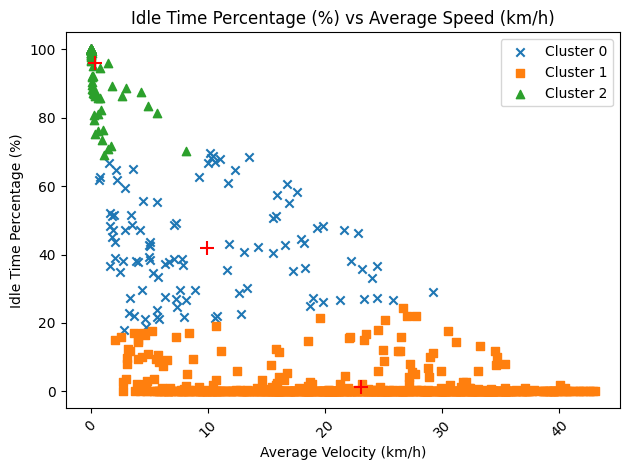

In [4]:
markers = ['x', 's', '^']

for cluster_label in set(kmeans_labels):
    cluster_data = [(avg_speed[i], idle_time[i]) for i, label in enumerate(kmeans_labels) if label == cluster_label]
    cluster_avg_speed, cluster_idle_time = zip(*cluster_data)
    plt.scatter(cluster_avg_speed, cluster_idle_time, label=f'Cluster {cluster_label}', marker=markers[cluster_label])

# Cluster centers
cluster_centers = kmeans.cluster_centers_
for i, center in enumerate(cluster_centers):
    plt.scatter(center[1], center[0], c='red', s=100, marker='+')

plt.xlabel('Average Velocity (km/h)')
plt.ylabel('Idle Time Percentage (%)')
plt.title('Idle Time Percentage (%) vs Average Speed (km/h)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
cluster_counts = np.bincount(kmeans_labels)

for cluster_idx, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_idx} has {count} points.")

Cluster 0 has 104 points.
Cluster 1 has 687 points.
Cluster 2 has 144 points.


In [6]:
for cluster in range(3):
    target_cluster = cluster

    target_cluster_points = data_for_clustering[kmeans_labels == target_cluster]

    cluster_center = kmeans.cluster_centers_[target_cluster]
    distances_to_center = np.linalg.norm(target_cluster_points - cluster_center, axis=1)

    no_of_closest_points = [100, 661, 139] 
    indices_closest_to_center = np.argsort(distances_to_center)[:no_of_closest_points[cluster]]

    closest_points_to_center = target_cluster_points[indices_closest_to_center]

    closest_points_df = pd.DataFrame(data=closest_points_to_center, columns=['idle time %', 'avg speed', 'avg long. acceleration'])

    closest_points_df.to_csv(f'closest_points/cluster_{cluster}_closest_points.csv', index=False)

    print("Closest points to the cluster center for cluster", target_cluster, ":")
    print(closest_points_df)

Closest points to the cluster center for cluster 0 :
    idle time %  avg speed  avg long. acceleration
0     43.000000  11.771117                0.021258
1     40.833333  13.075742               -0.025283
2     38.833333   7.770317               -0.047875
3     42.250000  14.275767               -0.004217
4     38.583333   7.087883                0.032233
..          ...        ...                     ...
95    66.916667  10.000083               -0.005383
96    67.000000  10.615183                0.046308
97    17.833333   2.787108                0.010892
98    67.916667  11.052383                0.042725
99    66.750000   1.517867               -0.017475

[100 rows x 3 columns]
Closest points to the cluster center for cluster 1 :
     idle time %  avg speed  avg long. acceleration
0       2.166667  23.158525               -0.083558
1       0.583333  23.627075                0.020850
2       0.333333  23.187617               -0.038492
3       0.250000  22.819000               -0.06531